In [44]:
import json
from collections import Counter
from hazm import word_tokenize, Normalizer
from wordcloud import WordCloud

In [45]:
import arabic_reshaper
from bidi.algorithm import get_display

In [46]:
with open('../data/python2022gp.json') as f:
    data = json.load(f)

In [77]:
stop_words = open('stopwords.txt').readlines()
stop_words = list(map(str.strip, stop_words))
stop_words = list(map(normalizer.normalize, stop_words))

In [78]:
text_content = ''
for message in data['messages']:
    if type(message['text']) is str:
        tokens = word_tokenize(message['text'])
        tokens = list(filter(lambda item: item not in stop_words, tokens))
        text_content += f" {' '.join(tokens)}"
    
    elif type(message['text']) is list:
        for sub_message in message['text']:
            if type(sub_message) is str:
                tokens = word_tokenize(sub_message)
                tokens = list(filter(lambda item: item not in stop_words, tokens))
                text_content += f" {' '.join(tokens)}"
            
            elif type(sub_message) is list:
                for sub_sub_msg in sub_message:
                    tokens = word_tokenize(sub_sub_msg['text'])
                    tokens = list(filter(lambda item: item not in stop_words, tokens))
                    text_content += f" {' '.join(tokens)}"

In [79]:
Counter(word_tokenize(text_content)).most_common()

[('.', 2800),
 ('؟', 1261),
 (')', 836),
 ('،', 784),
 (':', 668),
 ('(', 615),
 ('سلام', 613),
 ('نصب', 537),
 ('کلاس', 294),
 ('کار', 294),
 ('دوستان', 286),
 ('پایتون', 262),
 ('ممنون', 245),
 ('جلسه', 228),
 ('درست', 217),
 ('دانلود', 217),
 ('مشکل', 215),
 ('حل', 198),
 ('کنه', 196),
 ('سایت', 195),
 ('میکنه', 189),
 ('"', 184),
 ('همون', 182),
 ('نمیشه', 180),
 ('کن', 178),
 ('=', 178),
 ('کد', 175),
 ('دستور', 172),
 ('سوال', 170),
 ('ویندوز', 170),
 ('وارد', 167),
 ('ارور', 166),
 ('علی', 162),
 ('انجام', 160),
 ('فایل', 158),
 ('خب', 157),
 ('چی', 157),
 ('یعنی', 148),
 ('مثلا', 141),
 ('کنی', 140),
 ('x', 140),
 ('محیط', 140),
 ('بچه', 135),
 ('ممنونم', 134),
 ('درسته', 132),
 ('داخل', 129),
 ('دوره', 128),
 ('wsl', 128),
 ('حالا', 126),
 ('دارم', 124),
 ('نداره', 122),
 ('جواب', 120),
 ('اینجا', 118),
 ('لیست', 118),
 ('ک', 117),
 ('تمرین', 117),
 ('!', 116),
 ('میاد', 115),
 ('نظر', 114),
 ('ترمینال', 114),
 ('متوجه', 111),
 ('[', 108),
 ('کلا', 106),
 (']', 106),
 ('پیدا',

In [80]:
normalizer = Normalizer()
text_content = normalizer.normalize(text_content)

In [81]:
text_content = arabic_reshaper.reshape(text_content)
text_content = get_display(text_content)

In [82]:
wordcloud = WordCloud(font_path='./BHoma.ttf', background_color='white').generate(text_content)

(-0.5, 399.5, 199.5, -0.5)

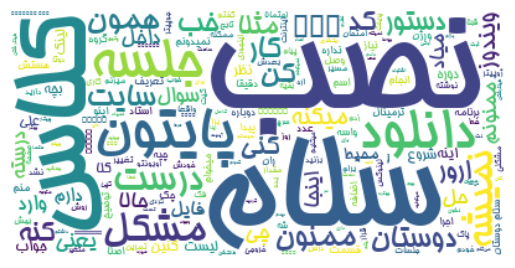

In [83]:
import matplotlib.pyplot as plt

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")